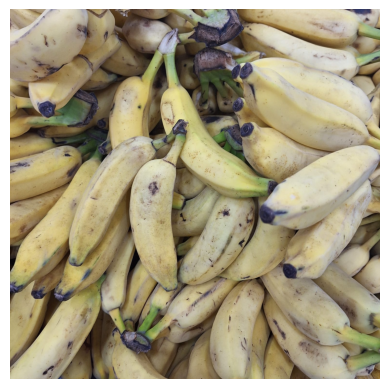

Classe predita: banana
__________________________________________________________


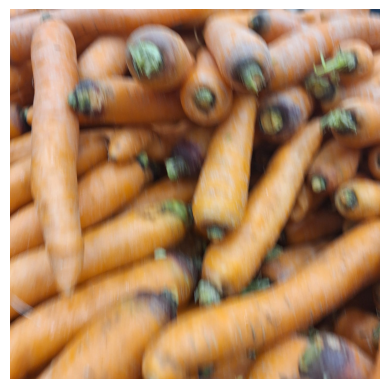

Classe predita: chain
__________________________________________________________


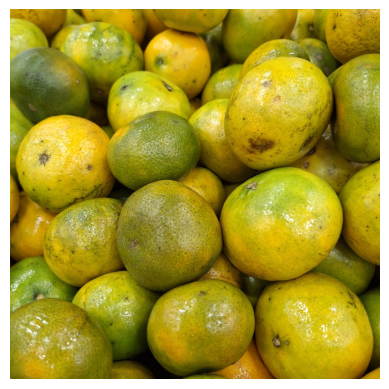

Classe predita: lemon
__________________________________________________________


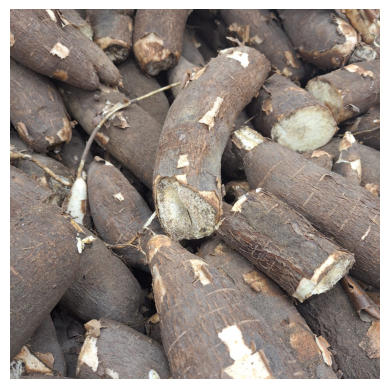

Classe predita: tile roof
__________________________________________________________


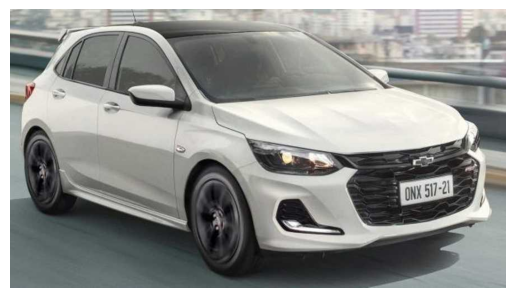

Classe predita: minivan
__________________________________________________________


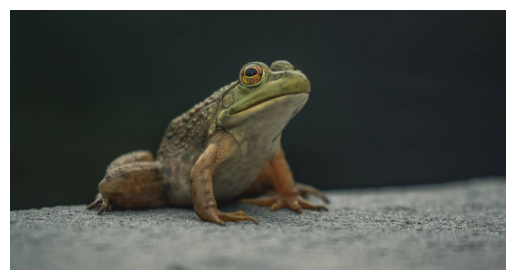

Classe predita: bullfrog
__________________________________________________________


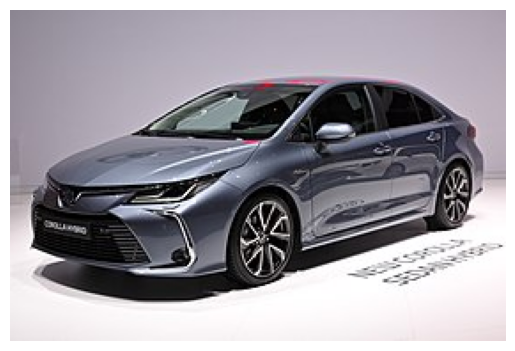

Classe predita: sports car
__________________________________________________________


In [19]:
import torch
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import os
import requests

# Carregar o modelo ResNet-18 pré-treinado
model = models.resnet34(weights='IMAGENET1K_V1')
model.eval()  # Colocar o modelo em modo de avaliação

# Função para carregar a imagem e aplicar transformações necessárias
def process_image(image):
    # Transformações: redimensionar, centralizar, converter para tensor e normalizar
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    
    image = preprocess(image)
    image = image.unsqueeze(0)  # Adiciona uma dimensão extra para o batch
    return image

# Função para carregar o modelo e fazer a previsão
def predict(image):
    # Processar a imagem
    image = process_image(image)
    
    # Fazer a previsão
    with torch.no_grad():
        output = model(image)
    
    # Obter a classe com maior pontuação
    _, predicted = torch.max(output, 1)
    return predicted.item()

def load_class_names():
    url = 'https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt'
    response = requests.get(url)
    class_names = response.text.splitlines()
    return class_names

# Diretório onde estão suas imagens
images_directory = 'images'

# Lista para armazenar os caminhos completos das imagens
images_list = []

# Verifica cada arquivo no diretório
for file_name in os.listdir(images_directory):
    # Verifica se o arquivo é uma imagem (pode ajustar para outros formatos se necessário)
    if file_name.endswith(('.jpg', '.jpeg', '.png', '.gif')):
        # Constrói o caminho completo para a imagem e adiciona à lista
        image_path = os.path.join(images_directory, file_name)
        image = Image.open(image_path).convert('RGB')
        images_list.append(image)

# Carregar os nomes das classes
class_names = load_class_names()

for image in images_list:
    plt.imshow(image)
    plt.axis('off')
    plt.show()
        
    # Fazer a previsão e imprimir o resultado
    classe_predita = predict(image)
    print(f'Classe predita: {class_names[classe_predita]}')
    print(f'__________________________________________________________')
